# Problem Statement

You Need to Predict the Price of a house based on its given attributes

- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.
- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the Dataset

df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Get the Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
# Get the Descriptive statistics of the Dataset

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


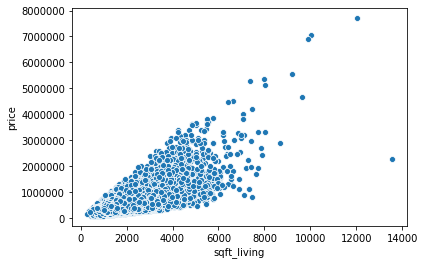

In [7]:
# Dataset Visualisation

# Visualize Price and Sqft

sns.scatterplot(x = 'sqft_living', y = 'price', data = df);

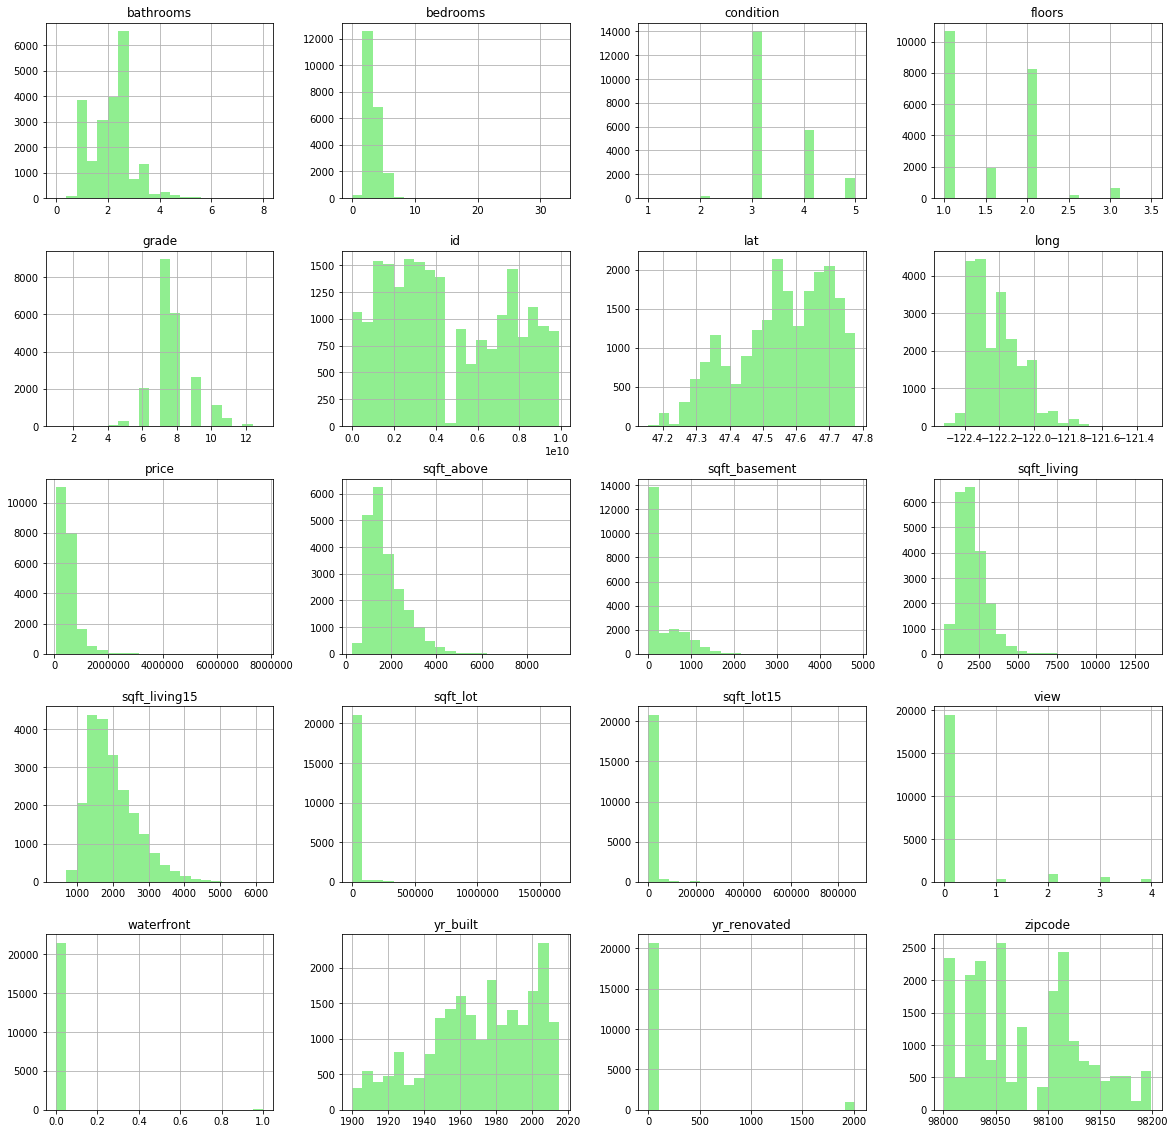

In [10]:
# Plot a Histogram for the whole Numerical Data

df.hist(bins = 20, figsize = (20,20), color = 'lightgreen');

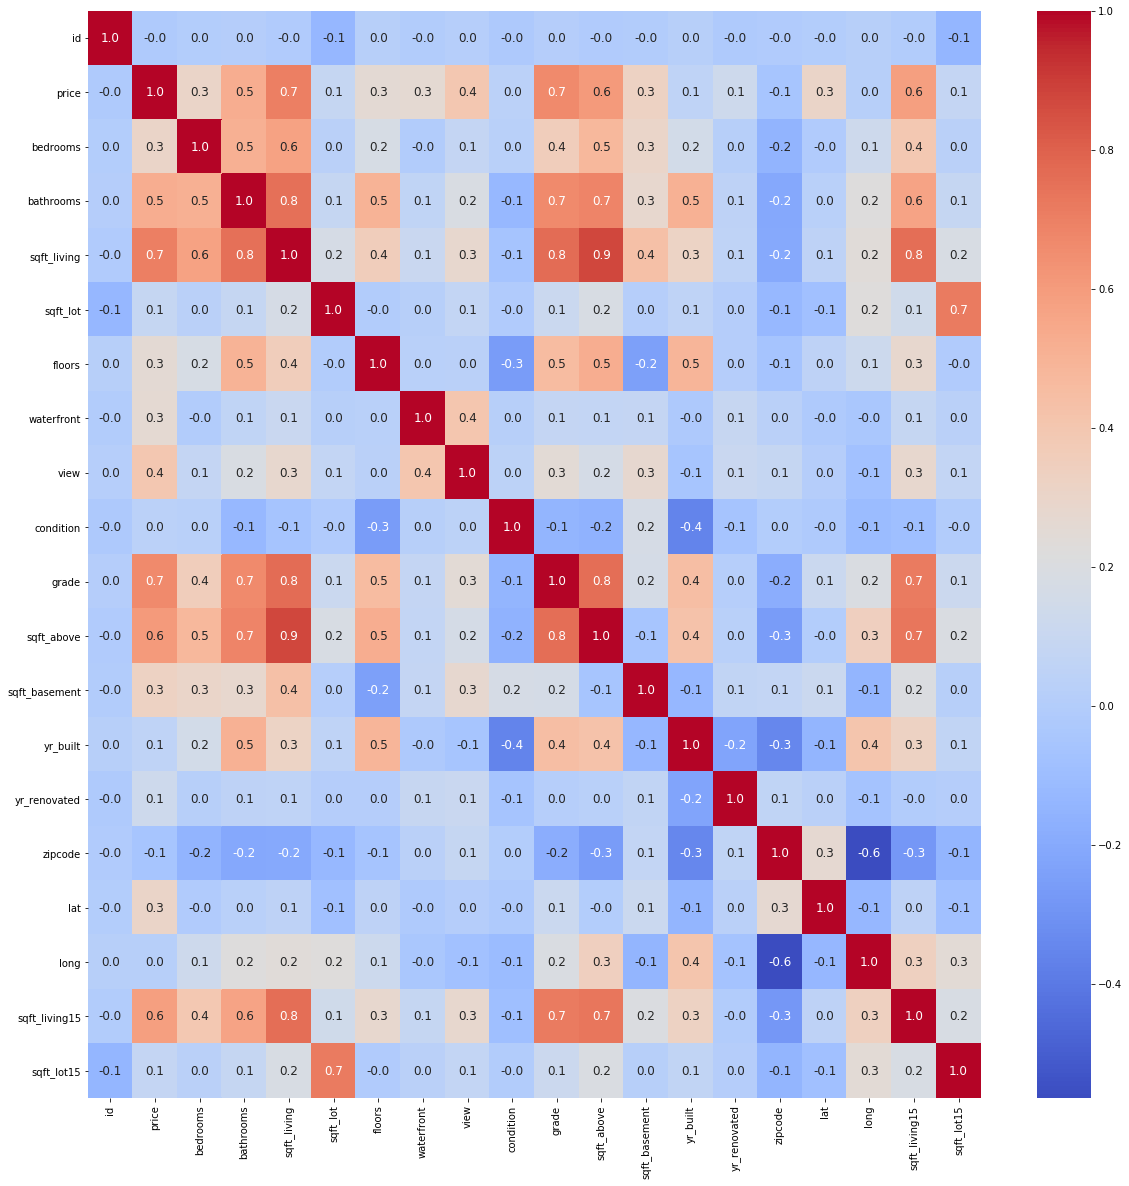

In [20]:
# Plot Heatmap to Identify the Correlations

# Create a base frame for the image via (f), and place the heatmap on ax
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', annot_kws={'size':12}, fmt=".1f");

In [26]:
# Use a Substet of Features for Data Predictions

df_sample = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'floors']]
df_sample.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,floors
0,221900.0,3,1.00,1180,5650,1180,0,1.0
1,538000.0,3,2.25,2570,7242,2170,400,2.0
2,180000.0,2,1.00,770,10000,770,0,1.0
3,604000.0,4,3.00,1960,5000,1050,910,1.0
4,510000.0,3,2.00,1680,8080,1680,0,1.0


In [32]:
# Feature Segmentation for Model Training 

selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

X = df[ selected_features ]
y = df['price']

print("The Shape of X and y are {} and {}".format(X.shape, y.shape))

The Shape of X and y are (21613, 7) and (21613,)


In [33]:
# Training the Machine Learning Model to test the Performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [34]:
# Building a Model

import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = X.shape[1], activation = 'relu')) # 7 * 100 + 100 bias
model.add(Dense(100, activation='relu')) # 100 * 100(Past neuron Output) + 100 bias
model.add(Dense(100, activation='relu')) # 100 * 100(Past neuron Output) + 100 bias
model.add(Dense(1, activation = 'linear')) # 100 last layer output + 1 bias

# Get the Model Summary
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Create a Compilation Function
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

# Model Training

epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 25, validation_split = 0.2, verbose=1)

Train on 12967 samples, validate on 3242 samples
Epoch 1/10
12967/12967 [==============================] - 0s 37us/step - loss: 63473816661.4452 - val_loss: 63530958191.0228
Epoch 2/10
12967/12967 [==============================] - 0s 31us/step - loss: 63252100117.0059 - val_loss: 61618446967.0771
Epoch 3/10
12967/12967 [==============================] - 0s 31us/step - loss: 63617690297.1444 - val_loss: 61145793504.4146
Epoch 4/10
12967/12967 [==============================] - 0s 34us/step - loss: 63616825024.5676 - val_loss: 61796853033.2190
Epoch 5/10
12967/12967 [==============================] - 0s 34us/step - loss: 63781008531.9892 - val_loss: 61300263557.2906
Epoch 6/10
12967/12967 [==============================] - 0s 32us/step - loss: 63467760863.5632 - val_loss: 61399489900.8118
Epoch 7/10
12967/12967 [==============================] - 0s 33us/step - loss: 63513882966.8864 - val_loss: 61143559673.9988
Epoch 8/10
12967/12967 [==============================] - 0s 33us/step - los

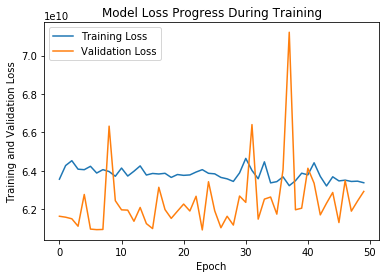

In [38]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [40]:
# The Loss is Huge and No Learning it Seems. So We need to Standardise the Dataset

# Feature Segmentation for Model Training 

selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

X = df[ selected_features ]
y = df['price']

print("The Shape of X and y are {} and {}".format(X.shape, y.shape))

The Shape of X and y are (21613, 7) and (21613,)


In [51]:
# Scale the Dataset by Min Max Scalar

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply Scaling to the Dataset
X_scaled = scaler.fit_transform(X)

# You must Reshape y (21613,) to (21613, 1) to apply Standardisation
y_1 = y.values.reshape(-1, 1)
print("The shape of y1 before is {} and now after reshaping is {}".format(y.shape, y_1.shape))
y_scaled = scaler.fit_transform(y_1)

The shape of y1 before is (21613,) and now after reshaping is (21613, 1)


In [52]:
# Split the Training and Test data for the Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

# Model Building

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

# Compiling the Model

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

# Training the Model
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 0s 23us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2/100
12967/12967 [==============================] - 0s 17us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/100
12967/12967 [==============================] - 0s 17us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 4/100
12967/12967 [==============================] - 0s 17us/step - loss: 9.8849e-04 - val_loss: 0.0010
Epoch 5/100
12967/12967 [==============================] - 0s 17us/step - loss: 9.9112e-04 - val_loss: 9.8758e-04
Epoch 6/100
12967/12967 [==============================] - 0s 17us/step - loss: 9.9058e-04 - val_loss: 9.7484e-04
Epoch 7/100
12967/12967 [==============================] - 0s 17us/step - loss: 9.8693e-04 - val_loss: 0.0010
Epoch 8/100
12967/12967 [==============================] - 0s 17us/step - loss: 9.7944e-04 - val_loss: 0.0010
Epoch 9/100
12967/12967 [==============================] - 0s 16us/step - l

12967/12967 [==============================] - 0s 17us/step - loss: 8.8250e-04 - val_loss: 0.0010
Epoch 74/100
12967/12967 [==============================] - 0s 17us/step - loss: 8.8301e-04 - val_loss: 9.7950e-04
Epoch 75/100
12967/12967 [==============================] - 0s 16us/step - loss: 8.7924e-04 - val_loss: 0.0010
Epoch 76/100
12967/12967 [==============================] - 0s 16us/step - loss: 8.9808e-04 - val_loss: 0.0011
Epoch 77/100
12967/12967 [==============================] - 0s 17us/step - loss: 8.9094e-04 - val_loss: 9.9260e-04
Epoch 78/100
12967/12967 [==============================] - 0s 18us/step - loss: 8.6784e-04 - val_loss: 0.0010
Epoch 79/100
12967/12967 [==============================] - 0s 18us/step - loss: 8.8158e-04 - val_loss: 0.0010
Epoch 80/100
12967/12967 [==============================] - 0s 17us/step - loss: 8.6688e-04 - val_loss: 9.9847e-04
Epoch 81/100
12967/12967 [==============================] - 0s 17us/step - loss: 8.6902e-04 - val_loss: 0.0010
Ep

dict_keys(['val_loss', 'loss'])


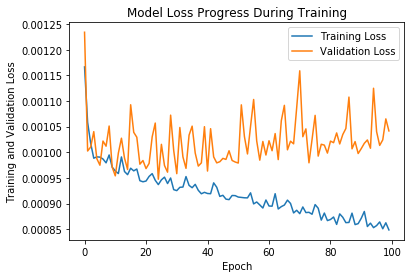

In [53]:
# Model Evaluation

# Get the Keys
print(epochs_hist.history.keys())

# Plot the History from Keys
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

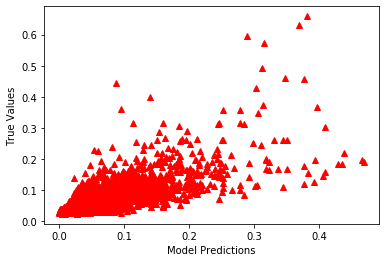

In [62]:
# Plot the Model Predictions Output Comparison between Actual and Predicted

y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

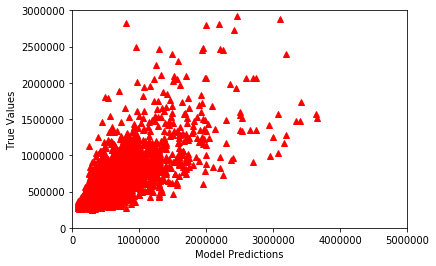

In [64]:
# To Get the Predictions for Inverse Transform Output Comparison between Actual and Predicted

y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

# Plot the File
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000) # Max Price limit
plt.ylim(0, 3000000);

In [59]:
# How can i get the Real Values from Feature Scaled Values

# Trying with a Input for Model Predictions
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'

X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

# Applying Scalar
scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)
y_predict_1 = model.predict(X_test_scaled_1)

# Inverse Scale
y_predict_2 = scaler.inverse_transform(y_predict_1)

# Print
print("The Feature Scaled Output for Model Prediction is {}, and \nThe Inverse of it (Original) value \
prediction is {}".format(y_predict_1, y_predict_2))

The Feature Scaled Output for Model Prediction is [[0.02479366]], and 
The Inverse of it (Original) value prediction is [[264051.66]]


In [65]:
# Check for the Model Metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Use for Adjusted R2
k, n = X_test.shape[1], len(X_test)

# Metrics for Calculation
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 251959.633 
MSE = 63483656896.31366 
MAE = 161153.24629903774 
R2 = 0.5182704865477956 
Adjusted R2 = 0.5176455594547331


In [67]:
# It is Not that great, We need to try with All Features or do Hyperparameter Tuning

# Feature Addition
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[selected_features]
y = df['price']

In [68]:
# Include the MinMax Scalar

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying the Scalar
X_scaled = scaler.fit_transform(X)
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

# Splitting the Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [70]:
# Model Building

model = Sequential()
model.add(Dense(100, input_dim = X_test.shape[1], activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

# Compiling the Model

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

# Training the Model
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 0s 23us/step - loss: 8.1278e-04 - val_loss: 6.2906e-04
Epoch 2/100
12967/12967 [==============================] - 0s 17us/step - loss: 5.2242e-04 - val_loss: 3.8967e-04
Epoch 3/100
12967/12967 [==============================] - 0s 17us/step - loss: 4.4270e-04 - val_loss: 3.5857e-04
Epoch 4/100
12967/12967 [==============================] - 0s 17us/step - loss: 4.1606e-04 - val_loss: 3.1411e-04
Epoch 5/100
12967/12967 [==============================] - 0s 18us/step - loss: 3.7038e-04 - val_loss: 3.0329e-04
Epoch 6/100
12967/12967 [==============================] - 0s 17us/step - loss: 3.6202e-04 - val_loss: 2.8733e-04
Epoch 7/100
12967/12967 [==============================] - 0s 17us/step - loss: 3.3056e-04 - val_loss: 2.8711e-04
Epoch 8/100
12967/12967 [==============================] - 0s 16us/step - loss: 3.3027e-04 - val_loss: 3.0602e-04
Epoch 9/100
12967/12967 [==============

Epoch 72/100
12967/12967 [==============================] - 0s 17us/step - loss: 1.4881e-04 - val_loss: 2.3776e-04
Epoch 73/100
12967/12967 [==============================] - 0s 17us/step - loss: 1.5822e-04 - val_loss: 2.1718e-04
Epoch 74/100
12967/12967 [==============================] - 0s 17us/step - loss: 1.5955e-04 - val_loss: 2.2888e-04
Epoch 75/100
12967/12967 [==============================] - 0s 17us/step - loss: 1.4940e-04 - val_loss: 2.1319e-04
Epoch 76/100
12967/12967 [==============================] - 0s 18us/step - loss: 1.7900e-04 - val_loss: 2.7359e-04
Epoch 77/100
12967/12967 [==============================] - 0s 18us/step - loss: 1.6861e-04 - val_loss: 2.3701e-04
Epoch 78/100
12967/12967 [==============================] - 0s 18us/step - loss: 1.5696e-04 - val_loss: 2.5929e-04
Epoch 79/100
12967/12967 [==============================] - 0s 18us/step - loss: 1.5629e-04 - val_loss: 3.3345e-04
Epoch 80/100
12967/12967 [==============================] - 0s 17us/step - loss:

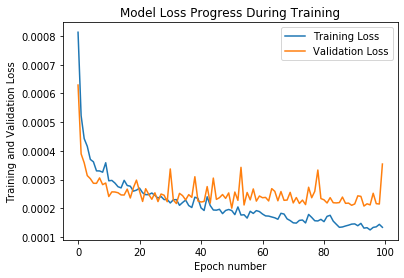

In [71]:
# Plot the Image Values

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

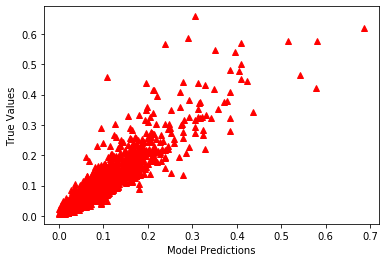

In [72]:
# Plot the Model Predictions Output Comparison between Actual and Predicted

y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

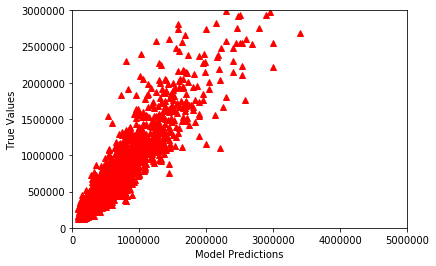

In [73]:
# To Get the Predictions for Inverse Transform Output Comparison between Actual and Predicted

y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

# Plot the File
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000) # Max Price limit
plt.ylim(0, 3000000);

In [75]:
# Predict for Original so that you can identify Metrics

y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [76]:
# Check for the Model Metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Use for Adjusted R2
k, n = X_test.shape[1], len(X_test)

# Metrics for Calculation
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 171800.69 
MSE = 29515476962.692265 
MAE = 91950.15247675333 
R2 = 0.7823595198052034 
Adjusted R2 = 0.7815914720482009


## Now try for Multiple Linear Regression

In [83]:
# Use a Substet of Features for Data Predictions

selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

X = df[selected_features]
y = df['price']
# Training the Machine Learning Model to test the Performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Linear Model Coeff (m) [-5.74094193e+04  1.92650570e+03  2.10433414e+02 -4.69900550e-01
  7.95078633e+03  9.60586191e+01  1.14374795e+02]
Linear Model Coeff (b) 81936.80671476375


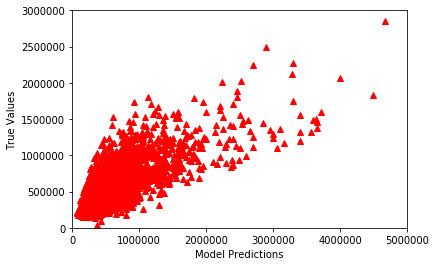

In [84]:
# Apply Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)
y_predict = regressor.predict(X_test)

# Plot Original vs Target
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000);

In [85]:
# Show the Metrics For Multiple Linear Regression

k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 268836.587 
MSE = 72273110252.78345 
MAE = 172992.2509764869 
R2 = 0.5215572229285053 
Adjusted R2 = 0.5209365595779678


In [86]:
# Use Multiple Features for Multiple Linear Regression

selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[selected_features]
y = df['price']
# Training the Machine Learning Model to test the Performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Linear Model Coeff (m) [-3.55943624e+04  3.96241682e+04  1.02115987e+02  1.12292697e-01
  5.13713489e+03  4.33522885e+01  5.87636983e+01  6.27283250e+05
  5.28211825e+04  2.44873808e+04  9.70211131e+04  4.33522885e+01
 -2.64748634e+03  1.72859928e+01 -5.92211131e+02  6.00867704e+05
 -2.09904954e+05  1.38564298e+01 -3.82616207e-01]
Linear Model Coeff (b) 8387424.689944122


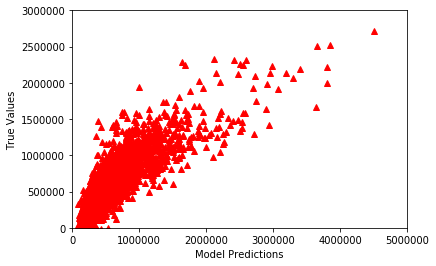

In [87]:
# Apply Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)
y_predict = regressor.predict(X_test)

# Plot Original vs Target
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000);

In [88]:
# Show the Metrics For Multiple Linear Regression

k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 191406.585 
MSE = 36636480642.03277 
MAE = 126641.05038146039 
R2 = 0.7051042503567122 
Adjusted R2 = 0.7040635707052965


## Try Out Regularisation Techniques

The Regression is used to reduce Overfitting by adding a weight (alpha) which will move the slope a little horizontally to get a best fit line that is generalized

### Training a Ridge Regression Model

In [96]:
# Use Multiple Features for Multiple Linear Regression

selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[selected_features]
y = df['price']
# Training the Machine Learning Model to test the Performance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

# Split the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Linear Model Coefficient (m):  [-3.72162903e+04  4.07088999e+04  9.80441156e+01  1.32433971e-01
  1.14903823e+04  3.81014829e+01  5.99426504e+01  3.90388341e+05
  5.74363633e+04  2.45913212e+04  1.01080552e+05  3.81014785e+01
 -2.76269491e+03  2.48965864e+01 -4.88074361e+02  5.01207735e+05
 -1.56225826e+05  2.04597921e+01 -4.70357622e-01]
Linear Model Coefficient (b):  9675809.489480007


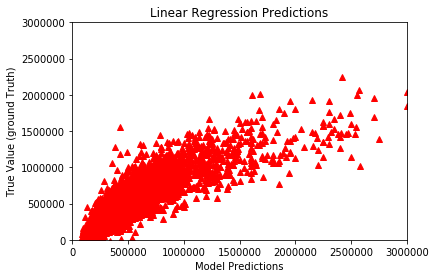

In [97]:
regressor_ridge = Ridge(alpha = 50)
regressor_ridge.fit(X_train, y_train)
print('Linear Model Coefficient (m): ', regressor_ridge.coef_)
print('Linear Model Coefficient (b): ', regressor_ridge.intercept_)

y_predict = regressor_ridge.predict(X_test)

# Plot the Visual

plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show();

In [98]:
# Get the Metrics

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 206329.473 
MSE = 42571851508.852036 
MAE = 126401.32770698499 
R2 = 0.6998649858760583 
Adjusted R2 = 0.6988058169926343


### Training a Lasso Regression Model

In [102]:
# Use Multiple Features for Multiple Linear Regression

selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[selected_features]
y = df['price']
# Training the Machine Learning Model to test the Performance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

# Split the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Linear Model Coefficient (m):  [-3.41152161e+04  3.49780124e+04  2.62343459e+02  1.59435063e-01
  6.66227572e+03  3.05275124e+01 -1.13748961e+02  5.36497746e+05
  5.51134029e+04  2.60373096e+04  9.70399237e+04 -1.15378538e+02
 -2.66591378e+03  2.41078406e+01 -5.28158314e+02  5.77860614e+05
 -1.70764379e+05  2.61783763e+01 -4.65881275e-01]
Linear Model Coefficient (b):  8013596.040320718


D:\Anaconda\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317298732986317.2, tolerance: 220116163257.28796
  positive)


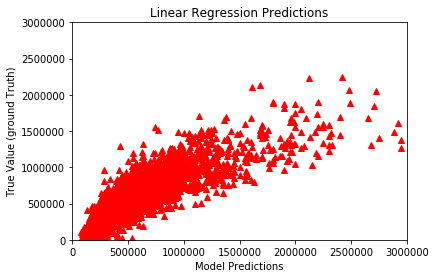

In [103]:
from sklearn.linear_model import Lasso

# We Assign Alpha Value
regressor_lasso = Lasso(alpha = 500)
regressor_lasso.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

# Predict the Value
y_predict = regressor_lasso.predict( X_test)

# Plot the Visual

plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show();

In [104]:
# Get the Metrics

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 196689.087 
MSE = 38686596748.24557 
MAE = 124071.8027024135 
R2 = 0.7062720434717968 
Adjusted R2 = 0.7052354849327858
